### Exercise 1 - Discrete random variable
The probability distribution function of a discrete variable k is given by the zero-truncated Poisson
distribution:


$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!(1-e^{-\lambda})} \quad \text{for } k = 1, 2, 3, \ldots$$

1) Write the R functions for the probability density and cumulative distribution functions, using the
R naming convention.

In [1]:
k = seq(1,8)
lambda = 1.4

d_pois = function(k) {
    result = (lambda^k * exp(-lambda)) / (factorial(k) * (1 - exp(-lambda)))
    return(result)
}

p_pois = function(k) {
    result = 0
    for (i in 1:k) {
        result = result + d_pois(i)
    }    
    return(result)
}

2) Assuming $\lambda = 1.4$. Produce two plots showing the pdf and cdf, separately.


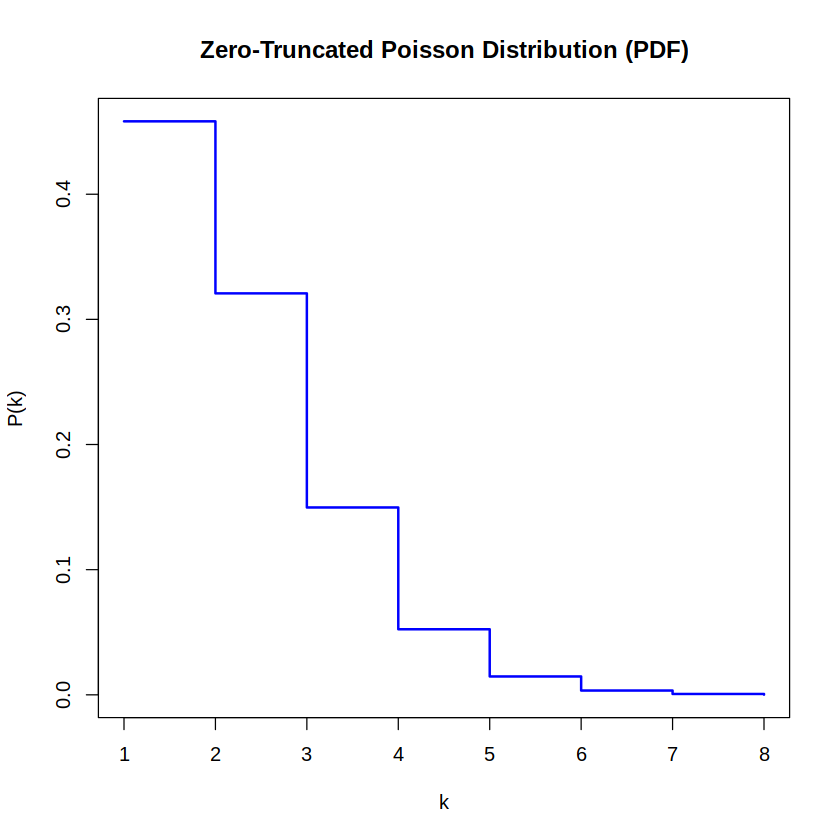

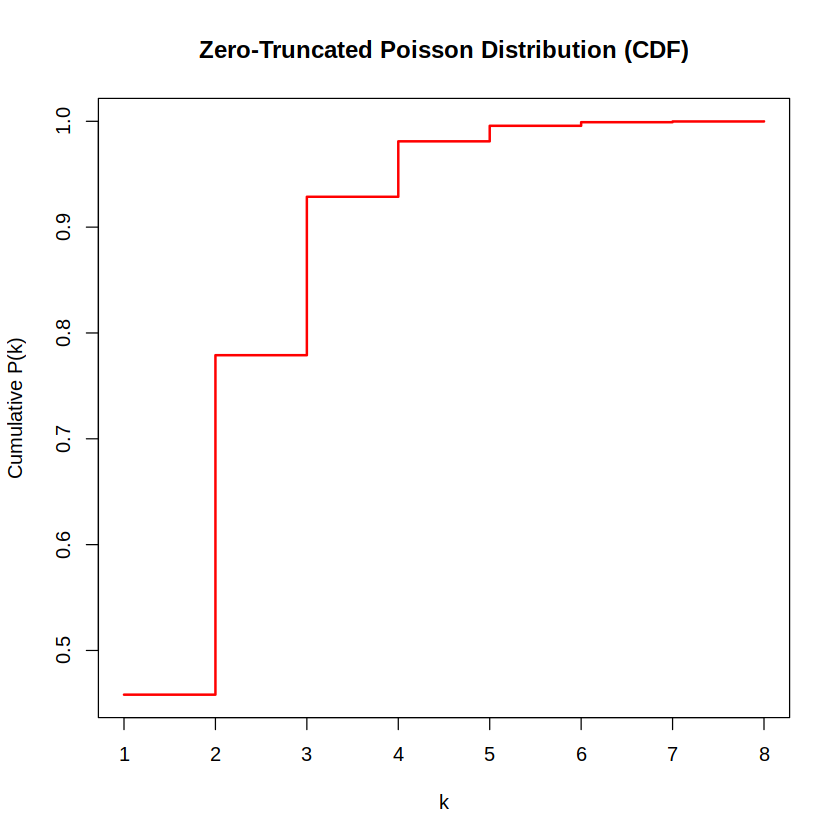

In [2]:
pdf = sapply(k, d_pois)
cdf = sapply(k, p_pois)

plot(k, pdf, type = "s", col = "blue", lwd = 2, pch = 16,
     main = "Zero-Truncated Poisson Distribution (PDF)",
     xlab = "k", ylab = "P(k)")

plot(k, cdf, type = "s", col = "red", lwd = 2, pch = 16,
     main = "Zero-Truncated Poisson Distribution (CDF)",
     xlab = "k", ylab = "Cumulative P(k)")

3) Compute the mean value and variance of the probability distribution using R.

In [3]:
d_expected_value = sum(k*pdf) #the expected value reflects the location of a distribution
d_variance = sum((k^2)*pdf) - d_expected_value^2 #the variance reflects the dispersion of the distribution

cat("The mean value of the zero-truncated Poisson distribution is:", round(d_expected_value,4), '\n')
cat("The variance of the zero-truncated Poisson distribution is:", round(d_variance,4))

The mean value of the zero-truncated Poisson distribution is: 1.858 
The variance of the zero-truncated Poisson distribution is: 1.0056

4) Generate a sample of random numbers from this distribution and show them in an histogram.
Evaluate the sample mean.

Sample Mean: 1.8592 
The difference between the mean and the expected value is: 0.001162846

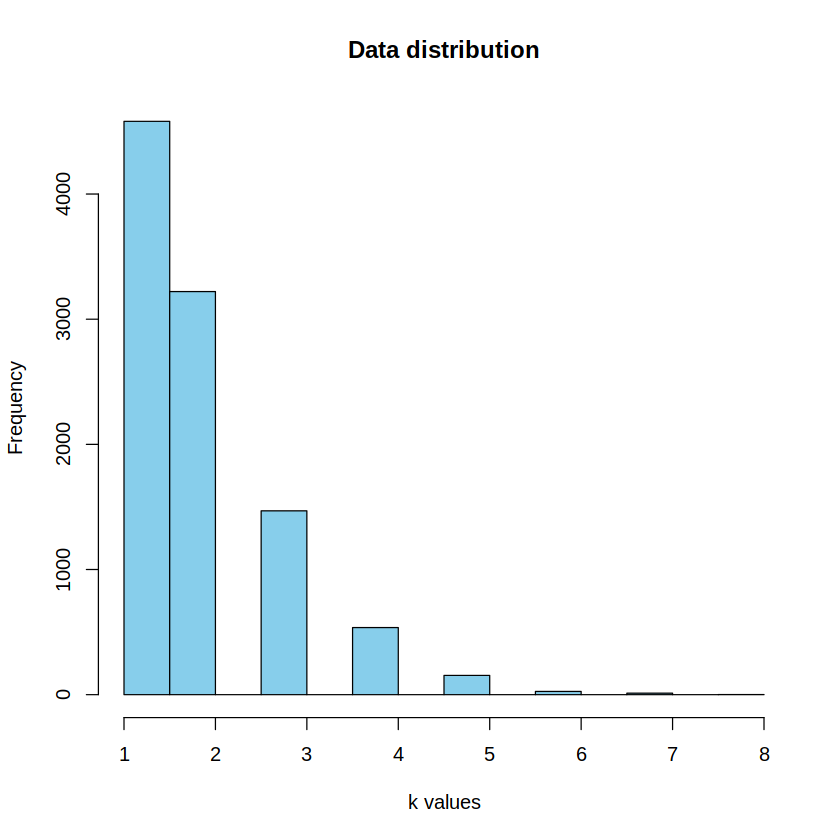

In [4]:
datas = sample(x=k, size=10000, replace=TRUE, prob=pdf)

hist(datas,
    breaks = "Sturges",
    main = "Data distribution",
    xlab = "k values",
    col = "skyblue",
    border = "black")

datas_mean = mean(datas)
cat("Sample Mean:", datas_mean, '\n') #close to the expected value
cat("The difference between the mean and the expected value is:", abs(datas_mean - d_expected_value))

### Exercise 2 - Continuous random variable

The energy distribution of CR muons at sea level can be approximated as follows

$$
p(E) = N 
\begin{cases} 
1 & \text{for } E < E_0 \\
({E - E_0 + 1})^{-\gamma} & \text{for } E \geq E_0 
\end{cases}
$$

where E0 = 7.25 GeV and γ = 2.7.

a) Compute the normalization factor N using R.

In [5]:
E_0 = 7.25 #GeV
gamma = 2.7

func = function(E) {
    if (E < E_0) {
        return(1)
    }
    else {
        return((E - E_0 + 1)^(-gamma))
    }
}

integration = integrate(Vectorize(func), lower=0, upper=10000)

cat("The integral is equal to:", integration$value, "with an error of:", integration$abs.error, '\n')

N = 1/integration$value

cat("The normalization factor N is equal to:", N)

The integral is equal to: 7.838189 with an error of: 0.000509911 
The normalization factor N is equal to: 0.1275805

b) Plot the probability density function in R.

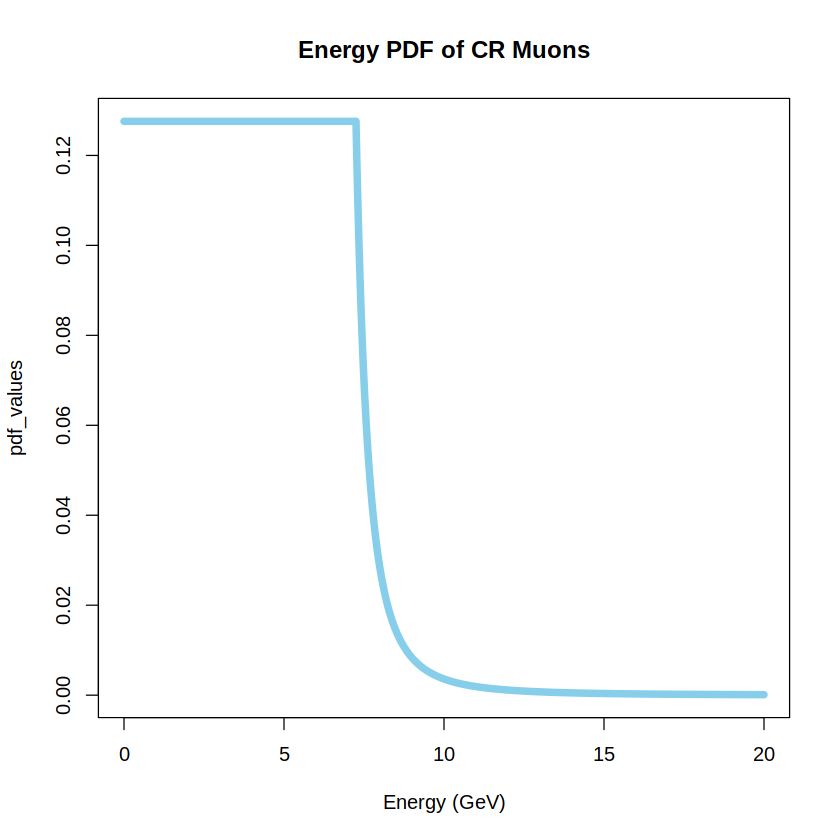

In [6]:
pdf_E = function(E) {
    if (E < E_0) {
        return(N*1)
    }
    else {
        return(N*((E - E_0 + 1)^(-gamma)))
    }
}

E_values = seq(0, 20, 0.01)
pdf_values = sapply(E_values, pdf_E)

plot(E_values, pdf_values,
     type = "l",
     lwd = 6,
     main = "Energy PDF of CR Muons",
     xlab = "Energy (GeV)",
     col = "skyblue")

c) Plot the cumulative density function in R.

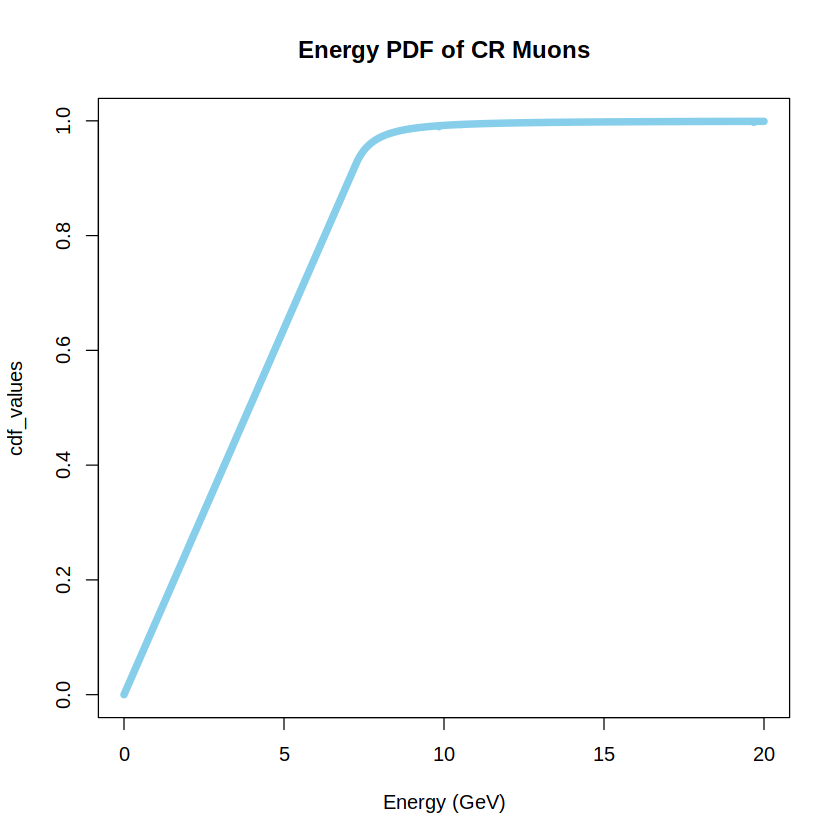

In [7]:
cdf = function (E) {
    integrate(Vectorize(pdf_E), lower=0, upper=E)$value
}

cdf_values = sapply(E_values, cdf)

plot(E_values, cdf_values,
     type = "l",
     lwd = 6,
     main = "Energy PDF of CR Muons",
     xlab = "Energy (GeV)",
     col = "skyblue")

d) Compute the mean value using R

In [8]:
pdf_E_mean = integrate(Vectorize(function (E) E * pdf_E(E)), lower=0, upper=Inf)
cat("The mean value calculated from the Probability Density Function is:", round(pdf_E_mean$value,4), "with an error of", 
round(pdf_E_mean$abs.error,4))

The mean value calculated from the Probability Density Function is: 4.0043 with an error of 2e-04

### Exercise 3

Suppose that the average number of accidents at an intersection is two per day.

a) Using Markov’s inequality, find a bound for the probability that at least five accidents will occur
tomorrow.

In [9]:
mu = 2 #per day
k = 5
markov_upper_limit = mu / k
cat("The upper limit for the probability is:", markov_upper_limit*100, "%")

The upper limit for the probability is: 40 %

b) Using Poisson random variables, calculate the probability that at least five accidents will occur
tomorrow. Compare this value with the bound obtained in the previous point a).

In [10]:
#the number of indipendent events that are defined in an certain amount of time can me described with a random P. variable.

pois_random_v = ppois(k-1, mu) #probability that x is less then 5
cat("The probability that the accidents in a day are less then 5 is:", pois_random_v*100, '\n')
cat("So the probability that the accident number is at least 5 is:", (1 - pois_random_v)*100)

#we can clearly see that this probability is way smaller then the upper limit setted by the Markov inequality.

The probability that the accidents in a day are less then 5 is: 94.7347 
So the probability that the accident number is at least 5 is: 5.265302

c) Let the variance of the number of accidents be two per day. Using Chebyshev’s inequality, find a
bound on the probability that tomorrow at least five accidents will occur.

In [11]:
#it is not probable that x will assume values that are too distant from the mean value.
variance = 2 #per day

cheb_ineq = variance / k^2
cat("The upper limit for the probability setted by the Chebyshev’s inequality is:", cheb_ineq*100, "%")
#wrong, this calculation is wrong

The upper limit for the probability setted by the Chebyshev’s inequality is: 8 %

### Exercise 4

The waiting period from the time a book is ordered until it is received is a random variable with mean
seven days and standard deviation two days. If Helen wants to be 95% sure that she receives a book by
certain date, how early should she order the book?

In [12]:
#mean attendance 7 days
#std 2 days
#P = 95%
#the most standard choice should be to go for a normal distribution and to use the quantile function qnorm()

mean = 7
std = 2
P = 0.95
days = qnorm(P, mean, std)
cat("Helen should order the book", round(days,0), "days earlier")

Helen should order the book 10 days earlier

### Exercise 5

An ordinary deck of 52 cards is divided randomly into 26 pairs. Using Chebyshev’s inequality, find
an upper bound for the probability that, at most, 10 pairs consist of a black and a red card.

In [19]:
#we first need to calculate the probability, the variance and the expectation value

#first i see what is the probability to have 1 pair with a red and a black card. i choose one red card from the 26 and then 1 black card
#if i pick a red card among the 52, the probability to pick a black card is out of 51 cards and viceversa
p = 26/51

cat("The probability that a single pair consist of 1 black card and 1 red card is:", round(p*100), "%", '\n')

#i know that the expected value can be calculated from the probability like so
E = p * 26
cat("The expected value is:", round(E,2), '\n')
#and the variance
var = p*26*(1-p)
cat("The variance is:", round(var,2), '\n')

#now i can calculate k, that is the number of standard deviations from the mean
sigma = sqrt(var)
k = abs(E - 10) / sigma

#and finally the upper bond for the Chebyshev’s inequality
upper_bond = 1 / k^2
cat("The upper bond setted by the Chebyshev’s inequality is:", round(upper_bond*100), "%")

The probability that a single pair consist of 1 black card and 1 red card is: 51 % 
The expected value is: 13.25 
The variance is: 6.5 
The upper bond setted by the Chebyshev’s inequality is: 61 %

### Exercise 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds.

a) Compute the probability of getting more than 6 passenger after 2 minutes. Evaluate the probability
of having less than 4 passenger after 3 minutes.

In [14]:
#this is a poisson distribution. in 2 minutes i should have 4 passengers
p_6_after_2 = ppois(6, 4)
cat("The probability of having more then 6 passengers after 2 minutes is:", round((1 - p_6_after_2)*100), "%", '\n')

#in 3 minutes i should have 6 passengers
p_4_after_3 = ppois(3, 6)
cat("The probability of having less then 3 passengers after 2 minutes is:", round(p_4_after_3*100), "%")


The probability of having more then 6 passengers after 2 minutes is: 11 % 
The probability of having less then 3 passengers after 2 minutes is: 15 %

b) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf.

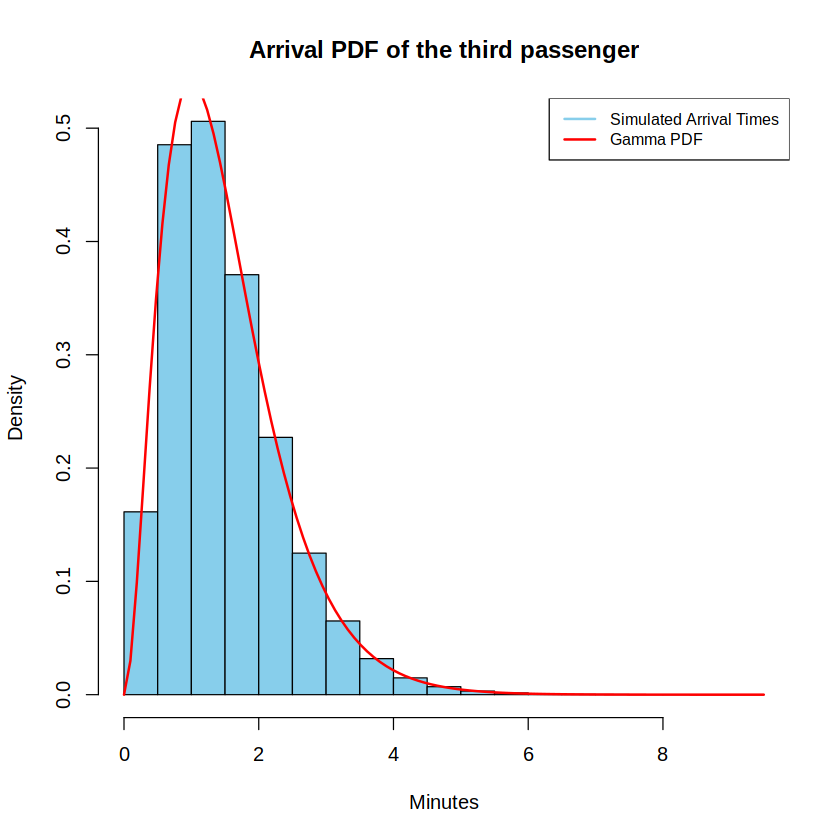

In [15]:
lambda = 2  #passengers per minute
n_simulations = 1000000

third_p_arrival_times = rexp(n_simulations, rate=lambda) + rexp(n_simulations, rate=lambda) + rexp(n_simulations, rate=lambda)

hist(third_p_arrival_times,
     breaks = "Sturges",
     probability = TRUE,
     main = "Arrival PDF of the third passenger",
     xlab = "Minutes",
     col = "skyblue",
     border = "black")

x = seq(0, max(third_p_arrival_times), by = 0.5)

curve(dgamma(x, shape=3, rate=lambda), from=0, to=max(third_p_arrival_times), 
      col="red", lwd=2, add=TRUE)

legend("topright", legend=c("Simulated Arrival Times", "Gamma PDF"), 
       col=c("skyblue", "red"), lwd=2, cex=0.8)

c) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the
first passenger.

[1] 1.50073

[1] 1.99996

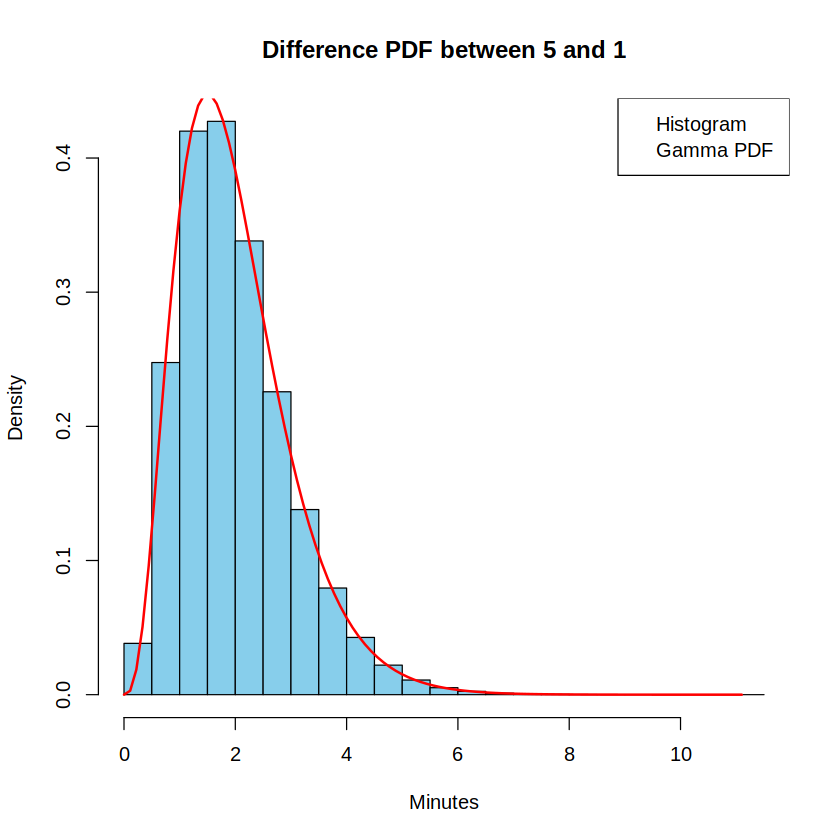

In [16]:
diff = rexp(n_simulations, lambda) + rexp(n_simulations, lambda) + rexp(n_simulations, lambda) + 
               rexp(n_simulations, lambda)

hist(diff,
     breaks = "Sturges",
     probability = TRUE,
     main = "Difference PDF between 5 and 1",
     xlab = "Minutes",
     col = "skyblue",
     border = "black")

x = seq(0, max(diff), by = 0.5)

curve(dgamma(x, shape=4, rate=lambda), 
      from=0, 
      to=max(diff),
      col = "red",
      lwd = 2,
      add = TRUE)

legend("topright",
       legend = c("Histogram", "Gamma PDF"),
       col = c("skyblue", "red"))

mean(third_p_arrival_times)
mean(diff)